In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

---------------------

In [356]:
recup = pd.read_csv('./curados/para_reg.csv')

In [4]:
recup.shape

(756, 20)

In [357]:
# dropeo todo o que tiene null (solo me quedo con lo robado y recuperado en este período.)
recup = recup.dropna()

In [6]:
recup.shape

(756, 20)

In [108]:
recup.columns

Index(['tramite_tipo', 'registro_seccional_descripcion',
       'automotor_anio_modelo', 'titular_domicilio_localidad',
       'titular_anio_nacimiento', 'unico_duenio', 'fecha_recup', 'dias',
       'dias_', 'dia_robo', 'mes_robo', 'dia_del_anio', 'tit_radicado',
       'titular_masculino', 'uso_privado', 'BUENOS AIRES', 'CHUBUT',
       'CIUDAD AUTÓNOMA DE BS.AS.', 'CORRIENTES', 'CÓRDOBA', 'ENTRE RÍOS',
       'JUJUY', 'LA PAMPA', 'MENDOZA', 'NEUQUÉN', 'RÍO NEGRO', 'SALTA',
       'SAN LUIS', 'SANTA FE', 'Importado', 'Nacional', 'AUDI', 'CHERY',
       'CHEVROLET', 'CITROEN', 'FIAT', 'FORD', 'HONDA', 'IVECO', 'JEEP',
       'MERCEDES BENZ', 'NISSAN', 'PEUGEOT', 'RENAULT', 'SUZUKI', 'TOYOTA',
       'CHASIS CON CABINA', 'COMBI', 'COUPE', 'FAMILIAR', 'FURGON', 'PICK UP',
       'SEDAN 3 P', 'SEDAN 4 P', 'TODO TERRENO'],
      dtype='object')

In [5]:
def daysonly(dias):
    return int(dias.split(' ')[0])

In [358]:
# genero una nueva columna donde el dato es solo la cantidad de dias como int
recup['dias_'] = recup['dias'].apply(daysonly)

In [359]:
# tirar automotor_uso_descripcion "no declarado" SON DOS SAMPLES
#recup['automotor_uso_descripcion'].value_counts()
recup = recup[recup['automotor_uso_descripcion'] != 'No declarado']

In [10]:
recup.head(2)

,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_descripcion,automotor_marca_descripcion,automotor_modelo_descripcion,...,titular_tipo_persona,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,unico_duenio,fecha_recup,dias,dias_
0,DENUNCIA DE ROBO O HURTO,2018-01-11,1988-09-06,ESTEBAN ECHEVERRIA Nº 1,Buenos Aires,Nacional,1988.0,FURGON,FORD,F-100,...,Física,LUIS GUILLON,BUENOS AIRES,Masculino,1988.0,ARGENTINA,1.0,2019-01-29,383 days 00:00:00.000000000,383
1,DENUNCIA DE ROBO O HURTO,2018-01-31,2017-03-31,LANUS Nº 1,Buenos Aires,Nacional,2017.0,SEDAN 4 P,FIAT,PALIO,...,Física,LANUS,BUENOS AIRES,Masculino,1986.0,ARGENTINA,1.0,2018-09-25,237 days 00:00:00.000000000,237


(0, 600)

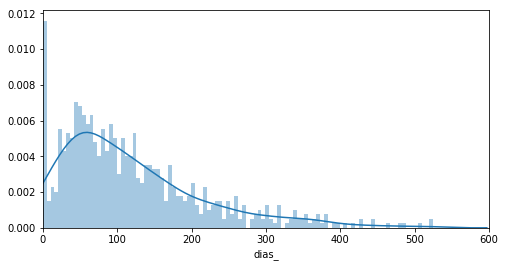

In [7]:
plt.figure(figsize= (8,4))
sns.distplot(recup.dias_, bins= 100)
plt.xlim(0,600)

------------------------

In [516]:
recup['log_dias'] = np.log10(recup['dias_']) # con 0 dropeados

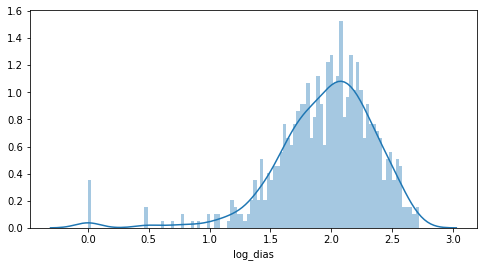

In [19]:
plt.figure(figsize= (8,4))
sns.distplot(recup.log_dias, bins= 100)
#plt.xlim(0,600)

-----------------------------

### OPCIONAL: tirar rows con dias = 0

In [360]:
recup = recup[recup['dias_'] != 0]

In [53]:
recup.dias_.describe()

count    722.000000
mean     125.754848
std       96.158774
min        1.000000
25%       55.000000
50%      100.000000
75%      169.000000
max      525.000000
Name: dias_, dtype: float64

-------------------------------------------

# Voy a hacer una regresión para ver si puedo predecir días hasta recupero

## limpio features y feature engineering

In [13]:
recup.columns

Index(['tramite_tipo', 'tramite_fecha', 'fecha_inscripcion_inicial',
       'registro_seccional_descripcion', 'registro_seccional_provincia',
       'automotor_origen', 'automotor_anio_modelo',
       'automotor_tipo_descripcion', 'automotor_marca_descripcion',
       'automotor_modelo_descripcion', 'automotor_uso_descripcion',
       'titular_tipo_persona', 'titular_domicilio_localidad',
       'titular_domicilio_provincia', 'titular_genero',
       'titular_anio_nacimiento', 'titular_pais_nacimiento', 'unico_duenio',
       'fecha_recup', 'dias', 'dias_'],
      dtype='object')

In [361]:
recup.drop(['tramite_tipo', 'registro_seccional_descripcion', 'titular_domicilio_localidad',
            'dias', 'fecha_recup'], axis= 1, inplace = True)

In [15]:
recup.columns

Index(['tramite_fecha', 'fecha_inscripcion_inicial',
       'registro_seccional_provincia', 'automotor_origen',
       'automotor_anio_modelo', 'automotor_tipo_descripcion',
       'automotor_marca_descripcion', 'automotor_modelo_descripcion',
       'automotor_uso_descripcion', 'titular_tipo_persona',
       'titular_domicilio_provincia', 'titular_genero',
       'titular_anio_nacimiento', 'titular_pais_nacimiento', 'unico_duenio',
       'dias_'],
      dtype='object')

In [16]:
# sacar de fecha de tramite (denuncia robo), mes y día de la semana, dia del año. 
# sacar de fecha_inscripción_inicial (patentamiento), año
# tirar titulpar_domicilio_provincia pero hacer columna que sea si está radicado en prov de domicilio

In [362]:
recup['tramite_fecha'] = pd.to_datetime(recup['tramite_fecha'])
recup['fecha_inscripcion_inicial'] = pd.to_datetime(recup['fecha_inscripcion_inicial'])


In [311]:
#recup['dia_robo'] = recup['tramite_fecha'].apply(lambda x: int(x.isoweekday())) #lunes es 1, domingo 7
recup['mes_robo'] = recup['tramite_fecha'].apply(lambda x: int(x.month))
#recup['dia_del_anio'] = recup['tramite_fecha'].apply(lambda x: int(x.timetuple().tm_yday))
#recup['anio_pat'] = recup['fecha_inscripcion_inicial'].apply(lambda x: int(x.year))

In [312]:
recup['registro_seccional_provincia'] = recup['registro_seccional_provincia'].apply(lambda x: x.upper()) 

In [313]:
#recup['tit_radicado'] = 
recup['tit_radicado'] = (recup['registro_seccional_provincia'] == recup['titular_domicilio_provincia']).astype(int)
recup['automotor_anio_modelo'] = recup['automotor_anio_modelo'].astype(int)
#recup['titular_anio_nacimiento'] = recup['titular_anio_nacimiento'].astype(int)


In [314]:
recup.drop(['tramite_fecha', 'fecha_inscripcion_inicial', 'titular_domicilio_provincia'], axis = 1, inplace= True)

In [315]:
# si quiero dropear anio_nac
recup.drop('titular_anio_nacimiento', axis = 1, inplace = True)

In [26]:
recup.head(2)

,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_descripcion,automotor_marca_descripcion,automotor_modelo_descripcion,automotor_uso_descripcion,titular_tipo_persona,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,unico_duenio,dias_,dia_robo,mes_robo,dia_del_anio,anio_pat,tit_radicado
0,BUENOS AIRES,Nacional,1988,FURGON,FORD,F-100,Privado,Física,Masculino,1988,ARGENTINA,1.0,383,4,1,11,1988,1
1,BUENOS AIRES,Nacional,2017,SEDAN 4 P,FIAT,PALIO,Privado,Física,Masculino,1986,ARGENTINA,1.0,237,3,1,31,2017,1


In [363]:
recup['dia_robo'] = recup['tramite_fecha'].apply(lambda x: int(x.isoweekday())) #lunes es 1, domingo 7
recup['mes_robo'] = recup['tramite_fecha'].apply(lambda x: int(x.month))
recup['dia_del_anio'] = recup['tramite_fecha'].apply(lambda x: int(x.timetuple().tm_yday))
#recup['anio_pat'] = recup['fecha_inscripcion_inicial'].apply(lambda x: int(x.year))

In [364]:
recup['registro_seccional_provincia'] = recup['registro_seccional_provincia'].apply(lambda x: x.upper()) 

In [365]:
#recup['tit_radicado'] = 
recup['tit_radicado'] = (recup['registro_seccional_provincia'] == recup['titular_domicilio_provincia']).astype(int)
recup['automotor_anio_modelo'] = recup['automotor_anio_modelo'].astype(int)
recup['titular_anio_nacimiento'] = recup['titular_anio_nacimiento'].astype(int)


In [366]:
recup.drop(['tramite_fecha', 'fecha_inscripcion_inicial', 'titular_domicilio_provincia'], axis = 1, inplace= True)

In [367]:
# si quiero dropear anio_nac
recup.drop('titular_anio_nacimiento', axis = 1, inplace = True)

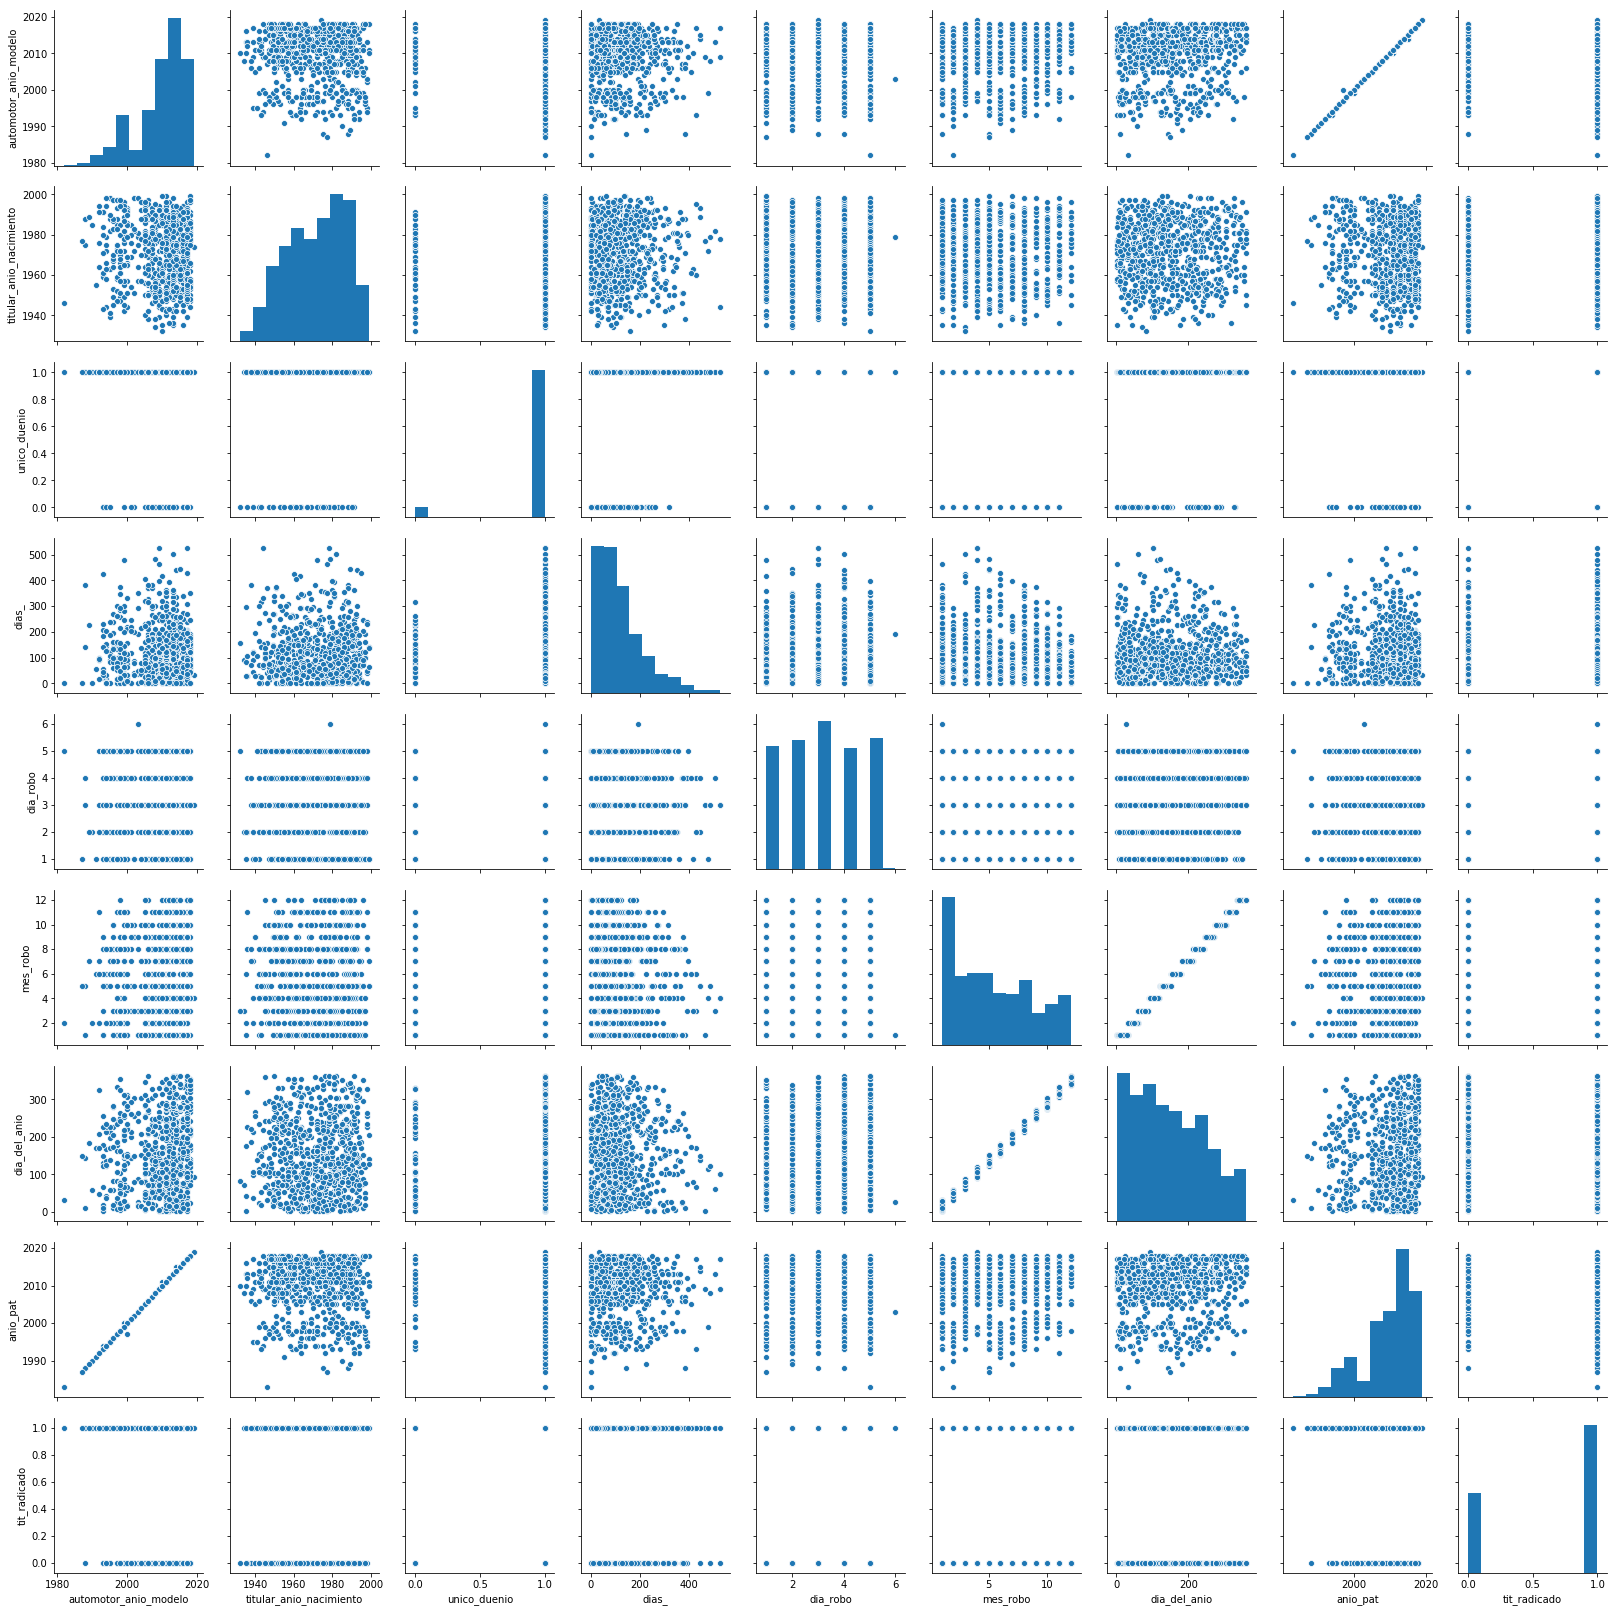

In [29]:
#TODO hacer pairplot con todo lo que quedó hasta acá
sns.pairplot(recup)
plt.savefig('./pairplot_reg_predummie.png', dpi= 300)

In [ ]:
# año pat y anio mod tienen colinearity, sacar año patentamiento, modelo solo sirve
# unico dueño 0 tira más a menor cantidad de días
# diciembre tira a menos tiempo

### Feature extraction

In [22]:
recup.columns

Index(['registro_seccional_provincia', 'automotor_origen',
       'automotor_anio_modelo', 'automotor_tipo_descripcion',
       'automotor_marca_descripcion', 'automotor_modelo_descripcion',
       'automotor_uso_descripcion', 'titular_tipo_persona', 'titular_genero',
       'titular_anio_nacimiento', 'titular_pais_nacimiento', 'unico_duenio',
       'dias_', 'dia_robo', 'mes_robo', 'dia_del_anio', 'tit_radicado'],
      dtype='object')

In [22]:
#recup['titular_pers_fisica'] = np.where(recup['titular_tipo_persona'] == 'Física', 1, 0) # NO VA, SON TODOS PERSONA FISICA

In [368]:
recup['titular_masculino'] = np.where(recup['titular_genero'] == 'Masculino', 1, 0)
recup['uso_privado'] = np.where(recup['automotor_uso_descripcion'] == 'Privado', 1, 0)
recup['Importado'] = np.where(recup['automotor_origen'] == 'Importado', 1, 0) # Nacional y prot 21 son virtualmente lo mismo

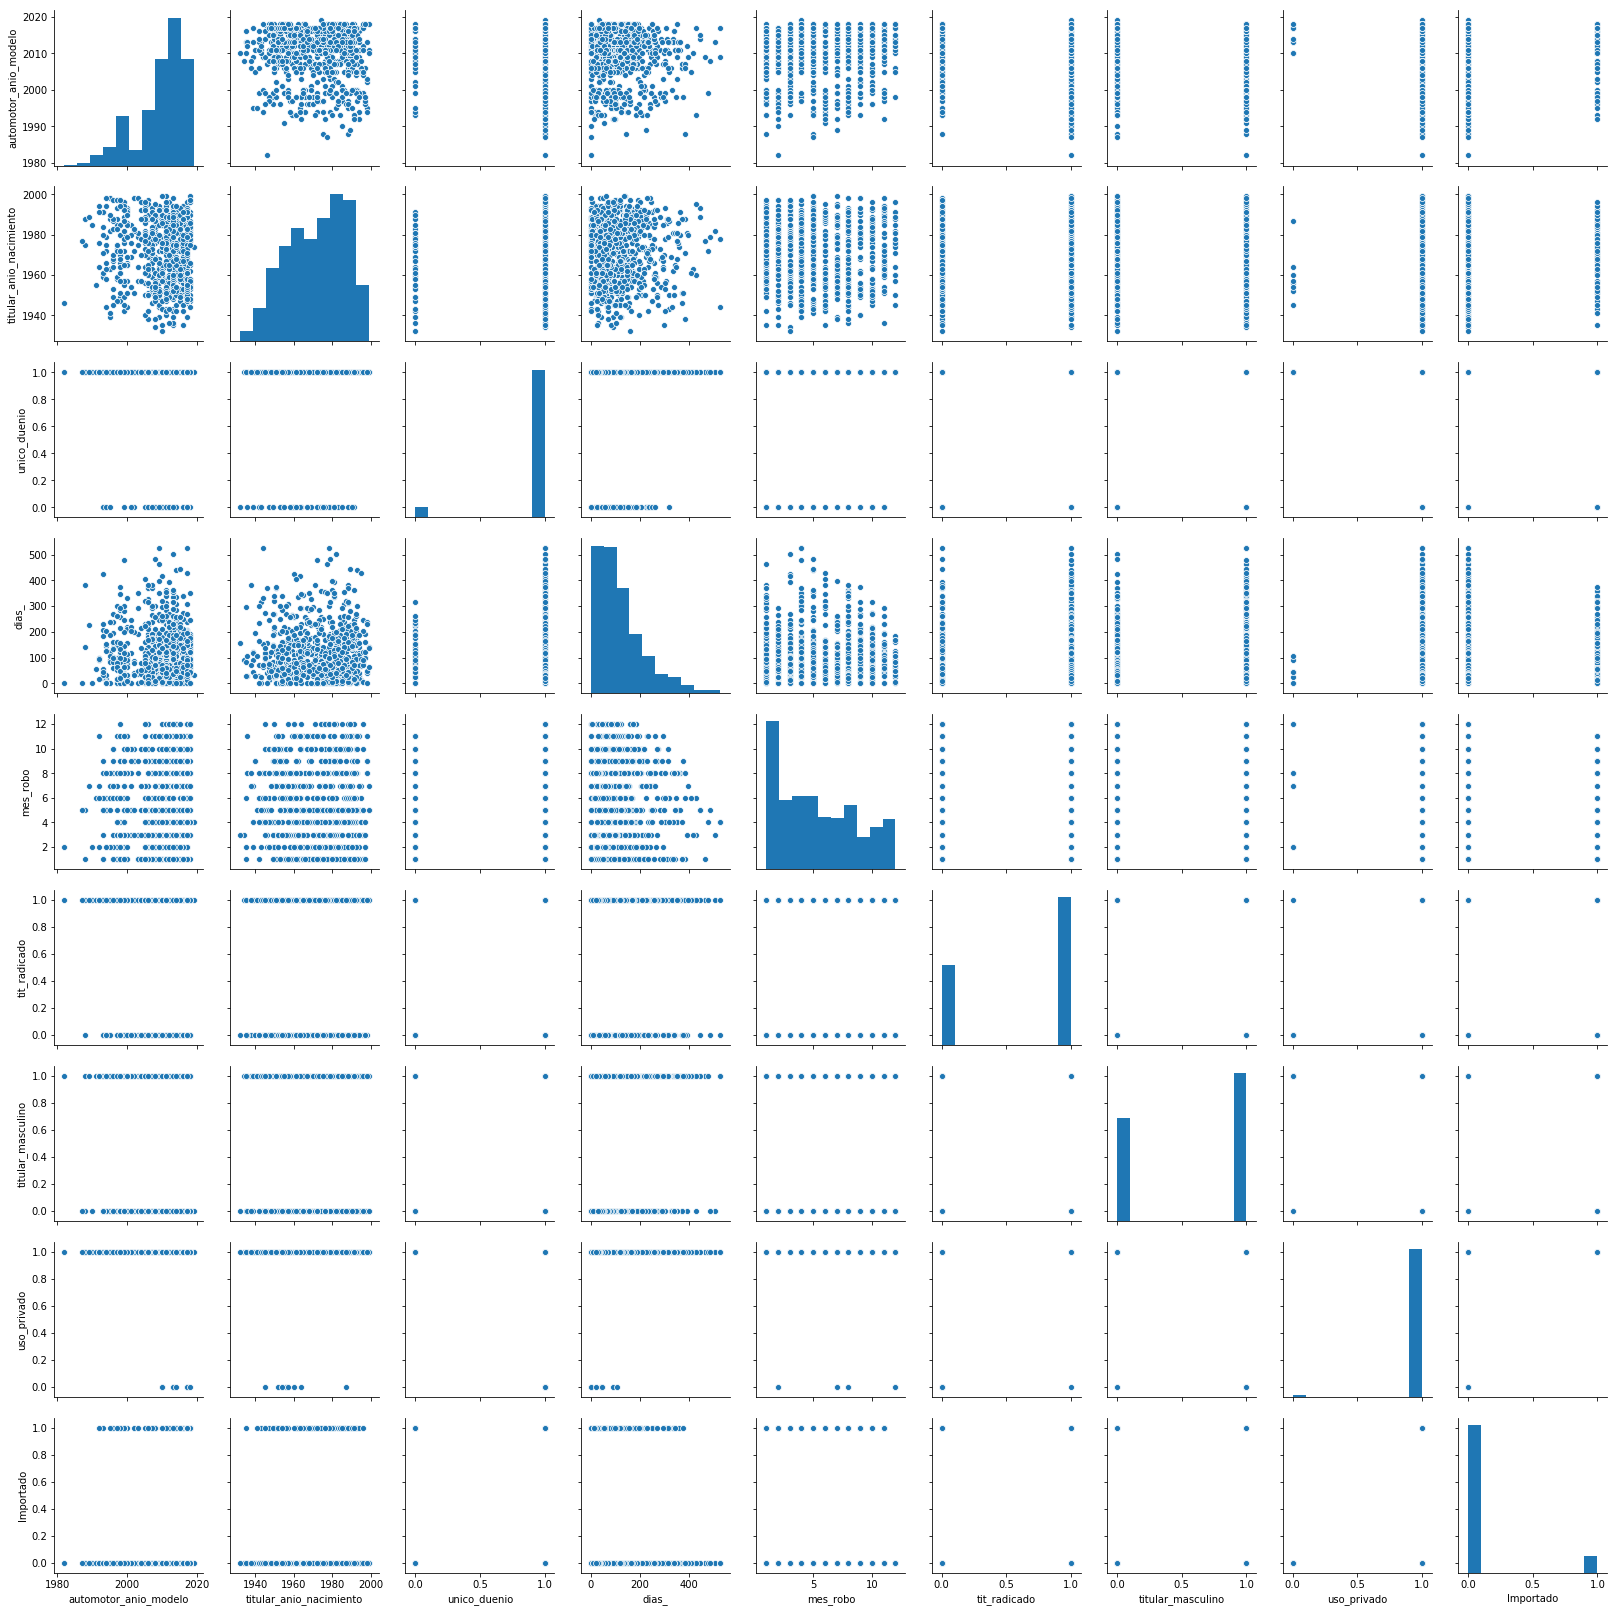

In [965]:
sns.pairplot(recup)
plt.savefig('./pairplot_prov.png', dpi= 300)

In [369]:
prov_dummie= pd.get_dummies(recup.registro_seccional_provincia) #**
tipo_dummie= pd.get_dummies(recup.automotor_tipo_descripcion) 
marca_dummie= pd.get_dummies(recup.automotor_marca_descripcion)
modelo_dummie= pd.get_dummies(recup.automotor_modelo_descripcion) #**
pais_tit_dummie = pd.get_dummies(recup.titular_pais_nacimiento)
# MARCA NO LA NECESITAMOS, CON MODELO YA TENÉS MARCA // tipo es necesario?, no está implicito también en marca? /pruebo sacar pais tit

In [370]:
#dropear la última columna de todos los dummies porque ya está explicada por el resto
tipo_dummie.drop(tipo_dummie.columns[-1], axis = 1, inplace = True)
prov_dummie.drop(prov_dummie.columns[-1], axis = 1, inplace = True)
marca_dummie.drop(marca_dummie.columns[-1], axis = 1, inplace = True)
modelo_dummie.drop(modelo_dummie.columns[-1], axis = 1, inplace = True)
pais_tit_dummie.drop(pais_tit_dummie.columns[-1], axis = 1, inplace = True)

In [371]:
#recup = recup.join([modelo_dummie, prov_dummie]) #marca_dummie, tipo_dummie, modelo_dummie, pais_tit_dummie
recup = recup.join([prov_dummie, marca_dummie, tipo_dummie, modelo_dummie, pais_tit_dummie]) #marca_dummie, tipo_dummie, modelo_dummie, pais_tit_dummie

In [ ]:
#sns.pairplot(recup)
#plt.savefig('./pairplot_reg.png', dpi= 300)

In [372]:
recup.drop(['registro_seccional_provincia', 'automotor_origen', 'automotor_uso_descripcion','automotor_tipo_descripcion',
        'automotor_marca_descripcion', 'automotor_modelo_descripcion','titular_pais_nacimiento', 
       'titular_tipo_persona', 'titular_genero'], axis= 1, inplace = True) # sacar anio_pat, 

In [58]:
recup.dtypes

automotor_anio_modelo        int32
titular_anio_nacimiento      int32
unico_duenio               float64
dias_                        int64
dia_robo                     int64
                            ...   
PEUGEOT                      uint8
RENAULT                      uint8
SUZUKI                       uint8
TOYOTA                       uint8
VOLKSWAGEN                   uint8
Length: 152, dtype: object

In [373]:
y = recup.dias_
#y= recup.log_dias

In [374]:
#X = recup.drop('dias_', axis= 1)
# saco todo lo que viene de fecha salvo dia de la semana
X = recup.drop('dias_', axis = 1)
#X = recup.drop(['dias_', 'log_dias'], axis = 1)

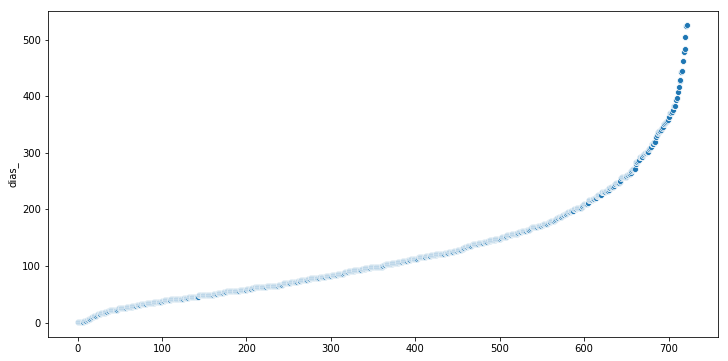

In [66]:
# ver como son los dias
plt.figure(figsize= (12,6))
sns.scatterplot(range(1,len(y) + 1), y.sort_values())

In [ ]:
# ver relaciones lineales de diferentes variables. y hacer polinomios

In [72]:
y.value_counts() #sacar los 0's? 

0      34
42     10
49     10
98      9
56      9
       ..
127     1
307     1
309     1
120     1
525     1
Name: dias_, Length: 279, dtype: int64

In [52]:
#ver como correlacionan las variables numéricas con y(dias_)
recup[['automotor_anio_modelo','unico_duenio', 'dias_', 'dia_robo', 'mes_robo', 'dia_del_anio',
       'titular_masculino', 'titular_anio_nacimiento', 'anio_pat', 'tit_radicado']].corrwith(recup['dias_'])

automotor_anio_modelo     -0.022931
unico_duenio               0.033787
dias_                      1.000000
dia_robo                   0.027481
mes_robo                  -0.016532
dia_del_anio              -0.019052
titular_masculino          0.055440
titular_anio_nacimiento    0.034559
anio_pat                  -0.022560
tit_radicado               0.063273
dtype: float64

In [141]:
X.shape

(722, 112)

In [905]:
X.columns

Index(['automotor_anio_modelo', 'titular_anio_nacimiento', 'unico_duenio',
       'dia_robo', 'mes_robo', 'dia_del_anio', 'tit_radicado',
       'titular_masculino', 'uso_privado', 'Importado', '147', '2008', '206',
       '207', '208', '301 ALLURE 1.6 HDI', '307', '308', '407', '408', '710',
       'A3', 'AGILE', 'AMAROK', 'ASTRA', 'AVEO', 'BERLINGO', 'BORA', 'C3',
       'C4', 'CHEROKEE', 'CITY', 'CIVIC', 'CLASSIC', 'CLIO', 'COROLLA',
       'CORSA', 'CRUZE', 'DAILY', 'DUCATO', 'DUNA', 'DUSTER', 'ECOSPORT',
       'ESCORT', 'ETIOS', 'F-100', 'FIESTA', 'FIORINO', 'FIT', 'FLUENCE',
       'FOCUS', 'FOX', 'FUN', 'GOL', 'GOLF', 'HIGH', 'HILUX', 'KA', 'KANGOO',
       'KWID', 'LOGAN', 'MEGANE', 'MERIVA', 'MOBI', 'ONIX', 'PALIO', 'PARTNER',
       'POLO', 'PRISMA', 'PUNTO', 'QQ', 'RANGER', 'RENAULT 12', 'RENAULT 19',
       'RENAULT 9', 'RENEGADE', 'S10', 'SANDERO', 'SCIROCCO 1.4 TSI', 'SHARAN',
       'SIENA', 'SPIN', 'SPRINTER', 'STRADA', 'SURAN', 'TAKE', 'TIGGO',
       'TIIDA', 'TRACKE

(-0.4, 0.4)

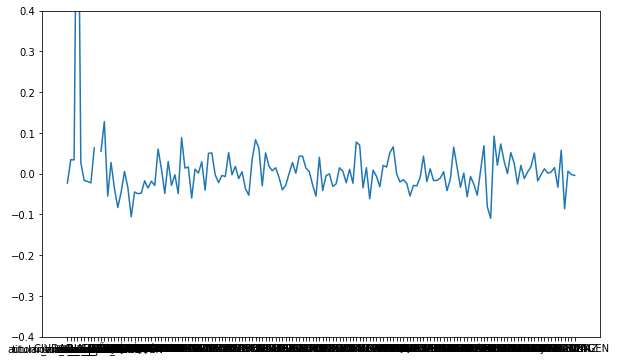

In [203]:
plt.figure(figsize= (10,6))
plt.plot(recup.corrwith(recup.dias_))
plt.ylim(-0.4, 0.4)

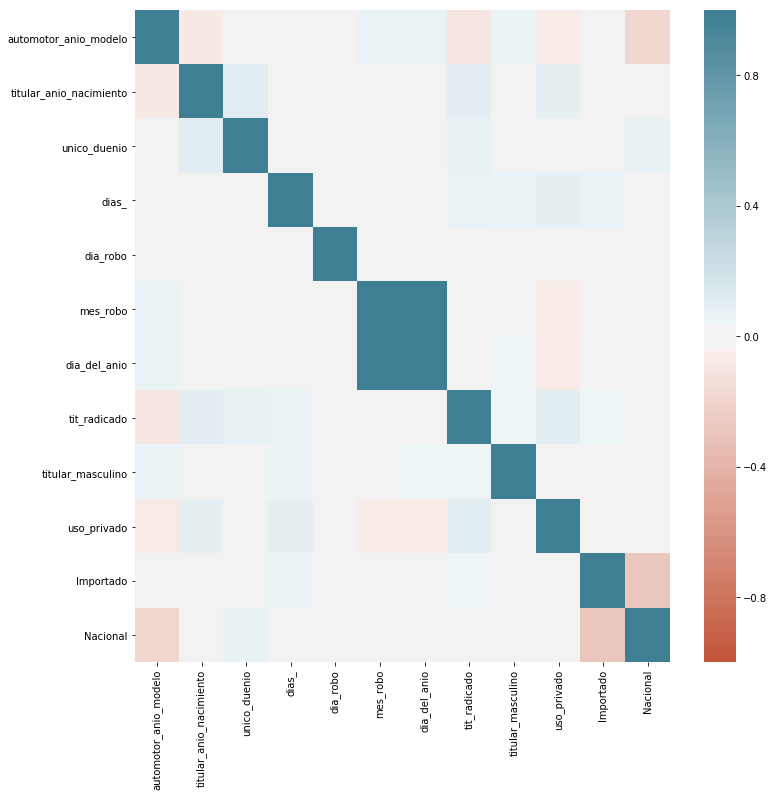

In [368]:
plt.figure(figsize= (12,12))
sns.heatmap(recup.corr(), vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200))

## Feature selection?

In [276]:
from sklearn import feature_selection

In [280]:
regresor_svr.best_params_

{'C': 100, 'gamma': 0.5, 'kernel': 'rbf'}

In [288]:
estimator = SVR(kernel = 'linear')
selector = feature_selection.RFE(estimator, step=1)

In [289]:
selector.fit(Xtrain_scal, ytrain)

RFE(estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                  gamma='auto_deprecated', kernel='linear', max_iter=-1,
                  shrinking=True, tol=0.001, verbose=False),
    n_features_to_select=None, step=1, verbose=0)

In [292]:
selector.ranking_, selector.n_features_

(array([ 1, 36,  7, 14, 25, 24,  1, 23,  1,  1,  1,  2,  1,  1, 11,  1,  1,
         1,  1,  8, 45, 63,  1, 18,  1,  1,  1,  1,  1, 22,  1,  9,  1,  1,
         1,  1,  1,  1, 35, 16,  1,  1,  1,  1,  5, 61, 57, 59,  1, 39, 38,
        41,  1,  1, 13, 42, 54, 58,  1,  1, 44,  1,  6,  1,  1,  1, 10,  1,
         1, 21,  1,  3, 50,  1, 46, 62, 48,  1, 26, 47, 15, 33, 49,  1,  1,
         1, 53,  1, 60, 52, 17,  1,  4,  1, 56, 51, 32, 43, 27, 31,  1, 40,
        28,  1,  1, 66, 65,  1,  1, 29, 30,  1,  1, 20, 64, 37,  1, 68,  1,
        34, 67,  1,  1,  1, 12, 55,  1,  1,  1,  1, 19,  1,  1]), 66)

In [293]:
y_rfe = selector.predict(Xtest_scal)

In [295]:
np.sqrt(mean_squared_error(ytest, y_rfe))

101.61975552534267

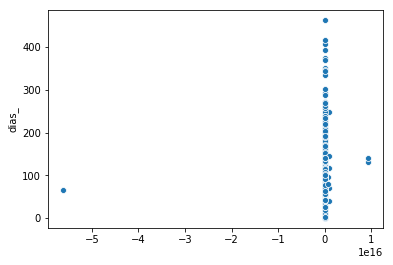

In [296]:
sns.scatterplot(ypred, ytest) # ESTO ES UNA PORNGA

----------------

# PCA

In [323]:
from sklearn.decomposition import PCA

In [375]:
pca = PCA(n_components= 10)

In [376]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [377]:
pca.explained_variance_ratio_[0:3]

array([9.94601590e-01, 4.82943155e-03, 2.06992431e-04])

In [378]:
print(f'los primeros dos componentes principales explican un {pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]} de la variabilidad')

los primeros dos componentes principales explican un 0.9994310212802309 de la variabilidad


In [379]:
X_pca = pca.transform(X)

In [380]:
X_pca.shape

(720, 10)

In [381]:
# Generar bins para poder estratificar la variable continua y tener representados todos los valores en el train test
bins = np.linspace(0, max(y)+ 1, 25)
y_binned = np.digitize(y, bins)

In [382]:
# Train test split
Xpcatrain, Xpcatest, ytrain, ytest = train_test_split(X_pca, y, test_size=0.3, random_state=7, stratify= y_binned)

## Linear regression

In [333]:
lr.fit(Xpcatrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [334]:
pcapred = lr.predict(Xpcatest)

In [335]:
np.sqrt(metrics.mean_squared_error(ytest, pcapred))

96.88807324404482

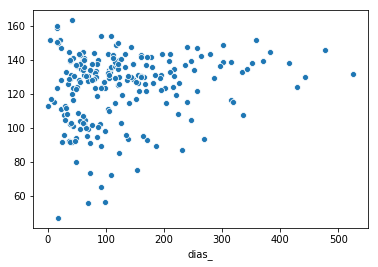

In [336]:
sns.scatterplot(ytest, pcapred)

## KNN (poronga)

In [110]:
regresorpca_neigh = GridSearchCV(neigh, parameters_knn, refit = True, cv= 10, verbose=True, scoring= 'neg_mean_squared_error')

In [111]:
regresorpca_neigh.fit(Xpcatrain, ytrain)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.2s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid=[{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
                          'weights': ['distance', 'uniform']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=True)

In [112]:
regresorpca_neigh.best_params_

{'n_neighbors': 99, 'weights': 'uniform'}

In [113]:
pcapred2 = regresorpca_neigh.predict(Xpcatest)

In [114]:
np.sqrt(metrics.mean_squared_error(ytest, pcapred2))

91.5250100458111

(0, 500)

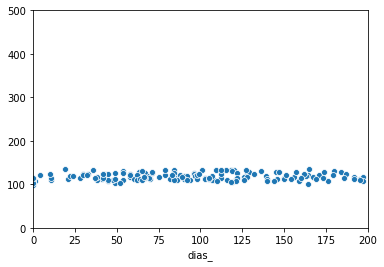

In [115]:
sns.scatterplot(ytest, pcapred2)
plt.xlim(0,200)
plt.ylim(0, 500) ### EVIDENTEMENTE KNN ES UNA VERGA, NO LO VOY A USAR MAS

## SVR

In [119]:
parameters_svr = [{'kernel':['rbf', 'linear'] , 'C': [50, 100, 1000],'gamma': [0.1,0.0001, 1], 'epsilon': [0.01, 0.1, 1]}]

In [120]:
regresorpca_svr = GridSearchCV(svreg, parameters_svr, cv= 5, verbose=True)

In [ ]:
regresorpca_svr.fit(Xpcatrain, ytrain)


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [136]:
regresorpca_svr.best_params_

{'C': 1000, 'epsilon': 1, 'gamma': 1, 'kernel': 'rbf'}

In [138]:
pcapred3 = regresorpca_svr.predict(Xpcapred)


In [139]:
np.sqrt(mean_squared_error(ytest, pcapred3))

91.80489840113313

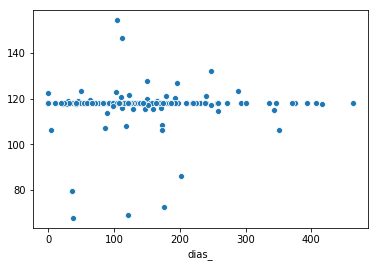

In [140]:
sns.scatterplot(ytest, pcapred3)

### Decision tree

In [352]:
from sklearn import tree
clf = tree.DecisionTreeRegressor(criterion= 'mse', min_samples_leaf= 4)
clf = clf.fit(Xpcatrain, ytrain)

In [353]:
y_clf = clf.predict(Xpcatest)

In [354]:
np.sqrt(metrics.mean_squared_error(ytest, y_clf))

125.30573588569851

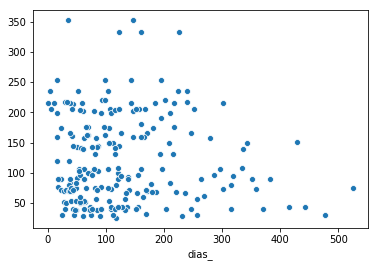

In [355]:
sns.scatterplot(ytest, y_clf)

Text(0.5, 1.0, 'residuals range: -262.4 - 404.8333333333333, mean: 13.426925338036439, median: -3.055555555555557')

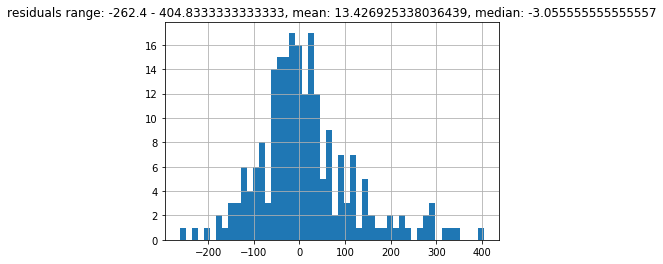

In [157]:
diff = ytest - y_clf
diff.hist(bins= 50)
plt.title(f'residuals range: {min(diff)} - {max(diff)}, mean: {np.mean(diff)}, median: {np.median(diff)}')

## RandomFor

In [383]:
pcarf = rfr_.fit(Xpcatrain, ytrain)

In [384]:
pcarf_y = rfr_.predict(Xpcatest)

In [385]:
np.sqrt(metrics.mean_squared_error(ytest, pcarf_y))

121.94274902227733

(0, 500)

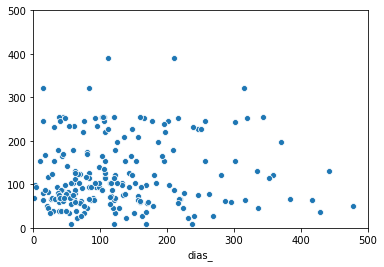

In [386]:
sns.scatterplot(ytest, pcarf_y)
plt.xlim(0,500)
plt.ylim(0, 500)

# Importo librerias de regresión

In [23]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
#from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

## Hago cosita

### train test split y escalo

In [284]:
# Generar bins para poder estratificar la variable continua y tener representados todos los valores en el train test
bins = np.linspace(0, max(y)+ 1, 25)
y_binned = np.digitize(y, bins)

In [285]:
# Train test split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=7, stratify= y_binned)

In [286]:
# Escalo con el Xtrain (escalar antes de dummies?)
scaler = preprocessing.StandardScaler().fit(Xtrain)
Xtrain_scal = scaler.transform(Xtrain)  
Xtest_scal = scaler.transform(Xtest)  

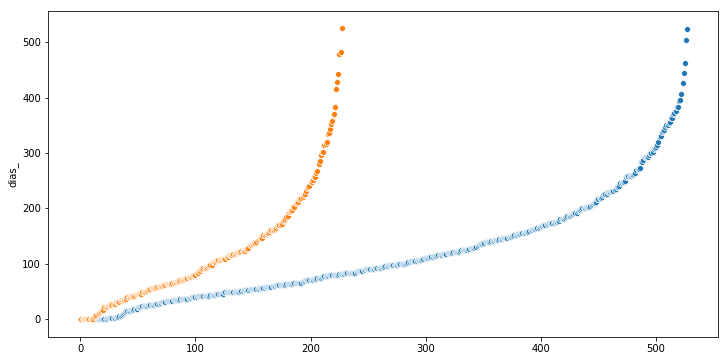

In [287]:
plt.figure(figsize= (12,6))
sns.scatterplot(range(1,len(ytrain) + 1), ytrain.sort_values())
sns.scatterplot(range(1,len(ytest) + 1), ytest.sort_values())

### LINEAR REGRESSION

In [27]:
#linear regression
lr = LinearRegression()

In [28]:
lr.fit(Xtrain_scal, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
ypred = lr.predict(Xtest_scal)

In [30]:
np.sqrt(metrics.mean_squared_error(ytest, ypred))

2563490095737255.0

(0, 500)

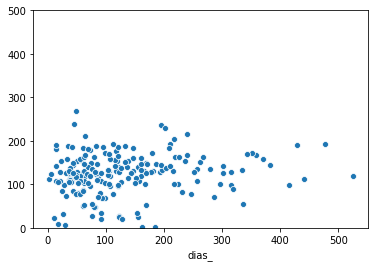

In [31]:
sns.scatterplot(ytest, ypred)
plt.ylim(0,500)

Text(0.5, 1.0, 'residuals range: -202.61358141768034 - 450.83492006012534, \n mean: 10.682874991838256, median: -6.053375735630226')

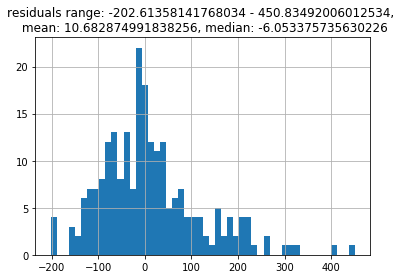

In [1119]:
diff = ytest - ypred
diff.hist(bins= 50)
plt.title(f'residuals range: {min(diff)} - {max(diff)}, \n mean: {np.mean(diff)}, median: {np.median(diff)}')

In [ ]:
# el plot que hay que hacer es parear y ordenar por ytest creciente (o ya está) hacer

### KNN

In [831]:
# KNN
neigh = KNeighborsRegressor()

In [832]:
parameters_knn = [{'n_neighbors': np.arange(1,175,2), 'weights' : ['distance', 'uniform']}]

In [833]:
regresor_neigh = GridSearchCV(neigh, parameters_knn, refit = True, cv= 10, verbose=True, scoring= 'neg_mean_squared_error')

In [834]:
regresor_neigh.fit(Xtrain_scal, ytrain)

Fitting 10 folds for each of 174 candidates, totalling 1740 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1740 out of 1740 | elapsed:   20.5s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid=[{'n_neighbors': array([  1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,
        27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,  51,
        53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,  77,
        79,  81,  83,  85,  87,  89,  91,  93,  95,  97,  99, 101, 103,
       105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129,
       131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155,
       157, 159, 161, 163, 165, 167, 169, 171, 173]),
                          'weights': ['dis

In [835]:
regresor_neigh.best_params_

{'n_neighbors': 65, 'weights': 'distance'}

In [836]:
ypred2 = regresor_neigh.predict(Xtest_scal)

In [837]:
np.sqrt(metrics.mean_squared_error(ytest, ypred2))

102.21536476016693

(0, 500)

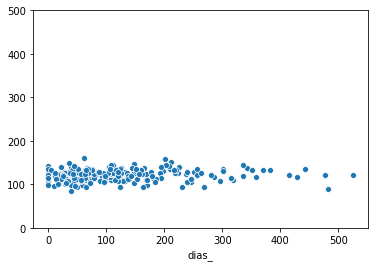

In [838]:
sns.scatterplot(ytest, ypred2)
#plt.xlim(0,200)
plt.ylim(0, 500)

Text(0.5, 1.0, 'residuals range: -142.9148901903478 - 402.39138294454494, \n mean: 2.1703977833469748, median: -22.733673416917014')

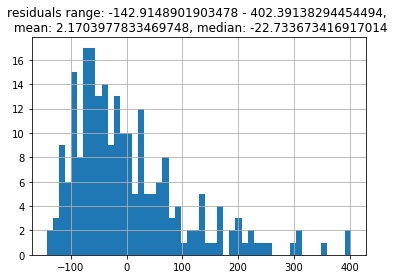

In [839]:
diff = ytest - ypred2
diff.hist(bins= 50)
plt.title(f'residuals range: {min(diff)} - {max(diff)}, \n mean: {np.mean(diff)}, median: {np.median(diff)}')

In [1033]:
iteraciones_knn = 200
err_knn = np.zeros(iteraciones_knn)
med_res_knn = np.zeros(iteraciones_knn)

In [1034]:
# hago un for loop para ir entrenando un clasificador en cada iteracion e ir probando distintos valores de k
for r in range(0,iteraciones_knn):
    # entreno un KNN classifier con "k=r+1"
    neigh = KNeighborsRegressor(n_neighbors=r+1, weights= 'distance')
    neigh.fit(Xtrain_scal, ytrain)
    # calculo la prediccion
    ypred_knn = neigh.predict(Xtest_scal)
    # guardo el resultado de prediccion en la posicion r del vector "acc_knn"
    diff = ytest - ypred_knn
    err_knn[r] = np.sqrt(metrics.mean_squared_error(ytest, ypred_knn))
    med_res_knn[r] = np.median(diff)

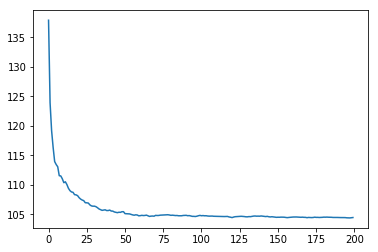

In [1036]:
#plt.plot(err_knn)
plt.plot(err_knn)
#plt.xlim(12,16)

-------------------------

In [1037]:
# KNN
neigh_opt = KNeighborsRegressor(n_neighbors= 25, weights= 'distance')

In [1038]:
neigh_opt.fit(Xtrain_scal, ytrain)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                    weights='distance')

In [1039]:
ypredkopt = neigh_opt.predict(Xtest_scal)

In [1040]:
np.sqrt(metrics.mean_squared_error(ytest, ypredkopt))

106.95722696241204

(0, 500)

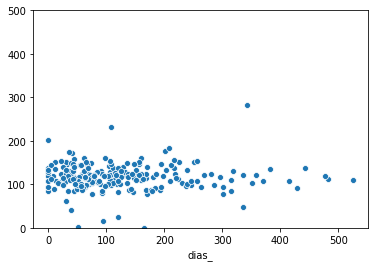

In [1041]:
sns.scatterplot(ytest, ypredkopt)
#plt.xlim(0,200)
plt.ylim(0, 500)

Text(0.5, 1.0, 'residuals range: -173.3772696519059 - 424.58102770689914, \n mean: 11.636020877325153, median: -10.452446943249257')

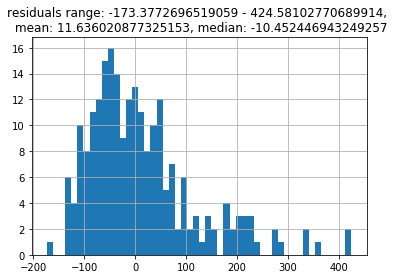

In [992]:
diff = ytest - ypredkopt
diff.hist(bins= 50)
plt.title(f'residuals range: {min(diff)} - {max(diff)}, \n mean: {np.mean(diff)}, median: {np.median(diff)}')

-------------------

In [86]:
knn_preds = zip(ytest, ypred2)

In [87]:
knn_preds = pd.DataFrame(knn_preds, columns = ['real', 'pred'])

(0, 500)

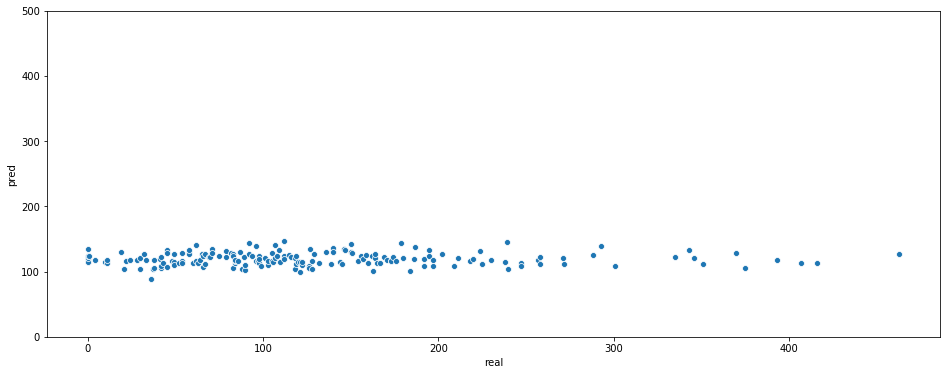

In [88]:
knn_preds.sort_values('real', inplace= True)
plt.figure(figsize= (16,6))
sns.scatterplot(knn_preds['real'], knn_preds['pred'])
#sns.scatterplot(range(len(ytest)), ytest, color= 'red', alpha= 0.5)
#sns.scatterplot(range(len(ypred2)), ypred2, color= 'blue', alpha= 0.5)
plt.ylim(0, 500)

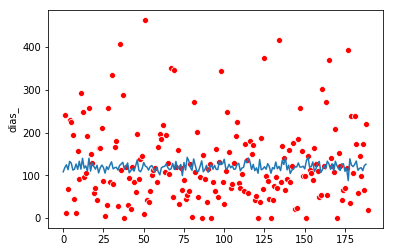

In [206]:
sns.scatterplot(range(1, ytest.shape[0]+ 1), ytest, color= 'r')
plt.plot(regresor_neigh.predict(Xtest_scal))


### SVR

In [117]:
# SVR
svreg = SVR()

In [133]:
parameters_svr = [{'kernel':['rbf', 'linear'] , 'C': [50, 100, 1000],'gamma': [0.1,0.0001, 1], 'epsilon': [0.01, 0.1, 1]}]

In [134]:
regresor_svr = GridSearchCV(svreg, parameters_svr, cv= 5, verbose=True)

In [135]:
regresor_svr.fit(Xtrain_scal, ytrain)


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed: 10.9min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [50, 100, 1000], 'epsilon': [0.01, 0.1, 1],
                          'gamma': [0.1, 0.0001, 1],
                          'kernel': ['rbf', 'linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [136]:
regresor_svr.best_params_

{'C': 1000, 'epsilon': 1, 'gamma': 1, 'kernel': 'rbf'}

In [137]:
regresor_svr.best_score_

-0.007096423478026226

In [138]:
ypred3 = regresor_svr.predict(Xtest_scal)


In [139]:
np.sqrt(mean_squared_error(ytest, ypred3))

91.80489840113313

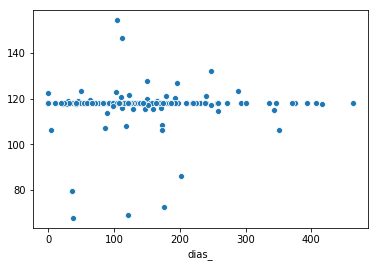

In [140]:
sns.scatterplot(ytest, ypred3)

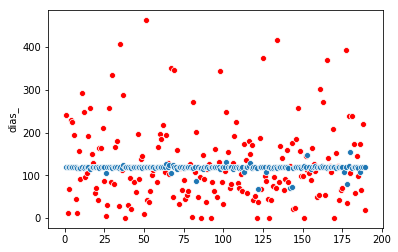

In [215]:
#sns.scatterplot(range(1, ytest.shape[0]+ 1), ytest, color= 'r')
#plt.plot(regresor_svr.predict(Xtest_scal))
sns.scatterplot(range(1, ytest.shape[0]+ 1), ytest, color= 'r')
sns.scatterplot(range(1, ytest.shape[0]+ 1), regresor_svr.predict(Xtest_scal))

### Decision Tree

In [288]:
from sklearn import tree
clf = tree.DecisionTreeRegressor(criterion= 'mse', min_samples_leaf= 4)
clf = clf.fit(Xtrain_scal, ytrain)

In [289]:
y_clf = clf.predict(Xtest_scal)

In [290]:
np.sqrt(metrics.mean_squared_error(ytest, y_clf))

115.8090774434367

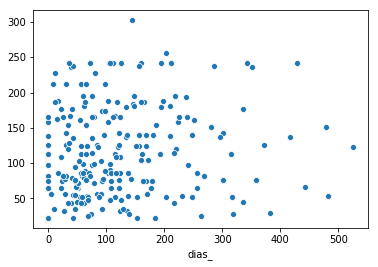

In [291]:
sns.scatterplot(ytest, y_clf)

Text(0.5, 1.0, 'residuals range: -262.4 - 404.8333333333333, mean: 13.426925338036439, median: -3.055555555555557')

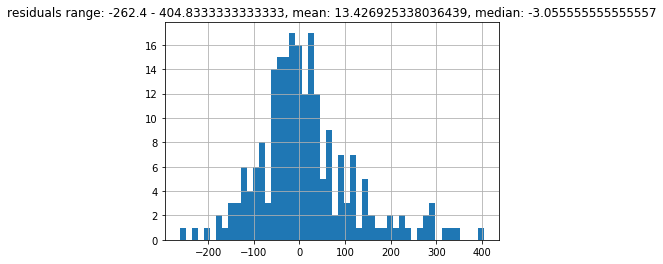

In [157]:
diff = ytest - y_clf
diff.hist(bins= 50)
plt.title(f'residuals range: {min(diff)} - {max(diff)}, mean: {np.mean(diff)}, median: {np.median(diff)}')

In [183]:
#tree.plot_tree()
arbol = clf.tree_

In [186]:
# VER BIEN COMO EXPORTAR EL ARBOL
# https://stackoverflow.com/questions/47213483/how-to-visualize-a-regression-tree-in-python
# https://stackoverflow.com/questions/25274673/is-it-possible-to-print-the-decision-tree-in-scikit-learn
# https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176

#import graphviz 
#dot_data = tree.export_graphviz(clf, out_file='tree.dot') 

In [292]:
# PRUEBAS
from sklearn.ensemble import AdaBoostRegressor

In [293]:
regr_2 = AdaBoostRegressor(tree.DecisionTreeRegressor(criterion= 'mse', min_samples_leaf= 4, min_samples_split= 10), n_estimators=350)


In [294]:
regr_2.fit(Xtrain_scal, ytrain)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=4,
                                                       min_samples_split=10,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=None,
                                                       splitter='best'),
                  learning_rate=1.0, loss='linear', n_estimators=350,
                  ran

In [295]:
ada_y = regr_2.predict(Xtest_scal)

In [296]:
np.sqrt(metrics.mean_squared_error(ytest, ada_y))

105.14157024842922

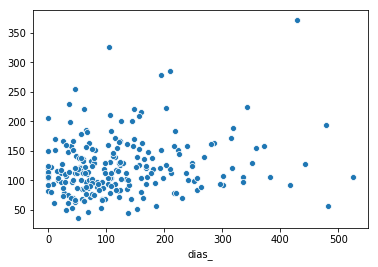

In [297]:
sns.scatterplot(ytest, ada_y)

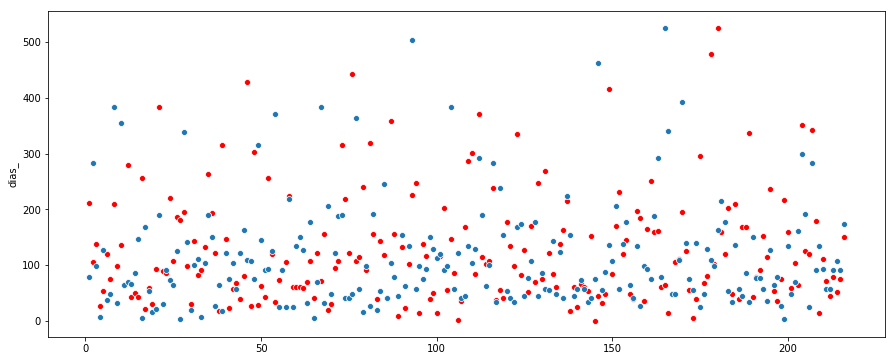

In [39]:
plt.figure(figsize = (15,6))
sns.scatterplot(range(1, ytest.shape[0]+ 1), ytest, color= 'r')
sns.scatterplot(range(1, ytest.shape[0]+ 1), clf.predict(Xtest_scal))

In [187]:
#depths = np.arange(1, 21)
#num_leafs = [1, 5, 10, 20, 50, 100]
#param_grid = [{'max_depth':depths,
#              'min_samples_leaf':num_leafs}]

parameters={'min_samples_split' : range(10,50,5),'max_depth': range(1,20,2)}

In [389]:
gst = GridSearchCV(estimator=clf, param_grid={'min_samples_split' : range(2,100,20),'max_depth': range(4,25,1)}, cv=10) #scoring=rmse_scorer

In [390]:
gst.fit(Xtrain_scal, ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(4, 25),
                         'min_samples_split': range(2, 100, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scor

In [391]:
gst.best_params_

{'max_depth': 4, 'min_samples_split': 82}

In [392]:
y_gst = gst.predict(Xtest_scal)

In [393]:
np.sqrt(metrics.mean_squared_error(ytest, y_gst))

96.4388484495024

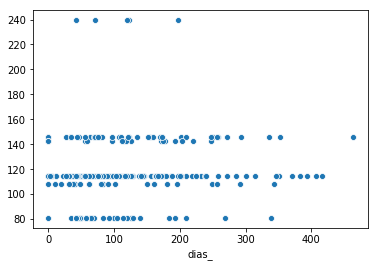

In [394]:
sns.scatterplot(ytest, y_gst) # TODO MAL

### Random Forest

In [298]:
from sklearn.ensemble import RandomForestRegressor as rfr

In [299]:
rfr_ = rfr(n_estimators = 50, min_samples_leaf= 4, min_samples_split= 10, bootstrap = False) #oob_score = True, warm_start = True

In [300]:
rfr_.fit(Xtrain_scal, ytrain)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [301]:
rfr_y = rfr_.predict(Xtest_scal)

In [302]:
np.sqrt(metrics.mean_squared_error(ytest, rfr_y))

115.15823084155062

(0, 500)

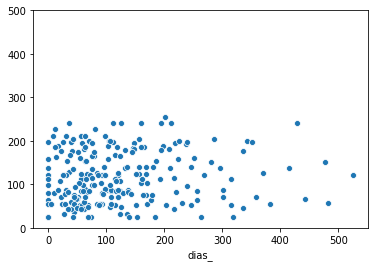

In [303]:
sns.scatterplot(ytest, rfr_y)
#plt.xlim(0,200)
plt.ylim(0, 500)

Text(0.5, 1.0, 'residuals range: -262.3999999999998 - 404.83333333333326, mean: 12.950665049970603, median: -4.985714285714327')

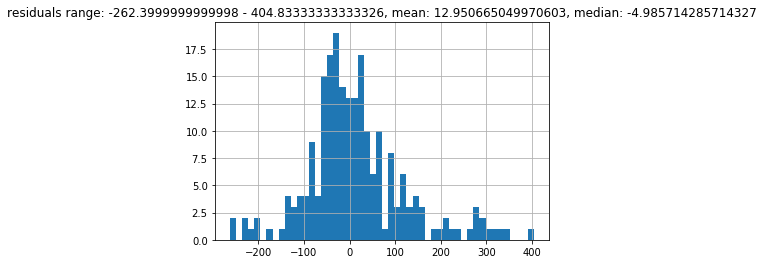

In [233]:
diff = ytest - rfr_y
diff.hist(bins= 50)
plt.title(f'residuals range: {min(diff)} - {max(diff)}, mean: {np.mean(diff)}, median: {np.median(diff)}')

## pruebita yellowbrick

In [90]:
from yellowbrick.regressor import ResidualsPlot

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


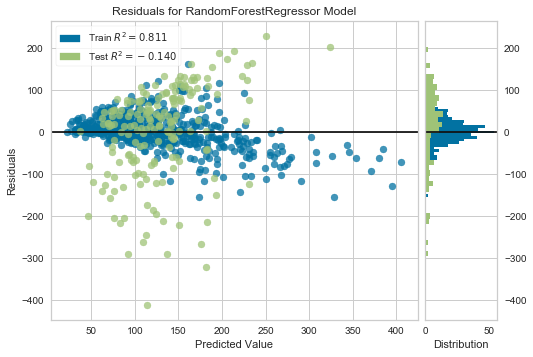

In [94]:
model = rfr()
visualizer = ResidualsPlot(model)

visualizer.fit(Xtrain_scal, ytrain)  # Fit the training data to the visualizer
visualizer.score(Xtest_scal, ytest)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

# SIN FEATURE EXTRACTION

In [237]:
recup2 = pd.read_csv('./curados/para_reg.csv')

In [238]:
# genero una nueva columna donde el dato es solo la cantidad de dias como int
recup2['dias_'] = recup2['dias'].apply(daysonly)

In [239]:
recup2.drop(['tramite_tipo', 'registro_seccional_descripcion', 'titular_domicilio_localidad',
            'dias', 'fecha_recup'], axis= 1, inplace = True)

In [240]:
recup2.drop(['tramite_fecha', 'fecha_inscripcion_inicial', 'titular_domicilio_provincia'], axis = 1, inplace= True)

In [241]:
prov_dummie= pd.get_dummies(recup2.registro_seccional_provincia)
origen_dummie= pd.get_dummies(recup2.automotor_origen)
tipo_dummie= pd.get_dummies(recup2.automotor_tipo_descripcion)
modelo_dummie= pd.get_dummies(recup2.automotor_modelo_descripcion)
uso_dummie= pd.get_dummies(recup2.automotor_uso_descripcion)
mas_dummie= pd.get_dummies(recup2.titular_genero)

In [243]:
recup2 = recup2.join([prov_dummie, origen_dummie, tipo_dummie,  modelo_dummie, uso_dummie, mas_dummie]) #marca_dummie,

In [244]:
recup2.drop(['registro_seccional_provincia', 'automotor_origen', 'automotor_uso_descripcion','automotor_tipo_descripcion',
        'automotor_marca_descripcion', 'automotor_modelo_descripcion','titular_pais_nacimiento', 
       'titular_tipo_persona', 'titular_genero'], axis= 1, inplace = True)

In [245]:
recup2.shape

(756, 122)

In [247]:
y2 = recup2['dias_']
X2 = recup2.drop('dias_', axis= 1)

In [252]:
X2train, X2test, y2train, y2test = train_test_split(X2, y2, test_size=0.25, random_state=42)

In [253]:
# Escalo con el Xtrain
scaler = preprocessing.StandardScaler().fit(X2train)
X2train_scal = scaler.transform(X2train)  
X2test_scal = scaler.transform(X2test)  

In [273]:
# KNN
knn = KNeighborsRegressor()

In [255]:
parameters_knn = [{'n_neighbors': np.arange(1,100,2), 'weights' : ['distance', 'uniform']}]

In [256]:
regresor_neigh = GridSearchCV(knn, parameters_knn, refit = True, cv= 10, verbose=True, scoring= 'neg_mean_squared_error')

In [263]:
regresor_neigh.fit(X2train_scal, y2train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   14.5s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid=[{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
                          'weights': ['distance', 'uniform']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=True)

In [264]:
regresor_neigh.best_params_

{'n_neighbors': 85, 'weights': 'uniform'}

In [265]:
y2pred2 = regresor_neigh.predict(X2test_scal)

In [266]:
np.sqrt(mean_squared_error(y2test, y2pred2))

91.94716546412353

(0, 500)

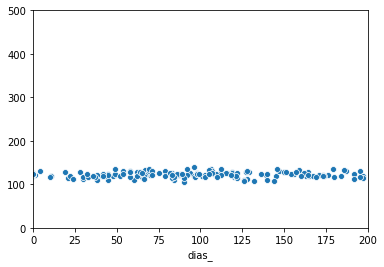

In [261]:
sns.scatterplot(y2test, y2pred2)
plt.xlim(0,200)
plt.ylim(0, 500)

In [262]:
iteraciones_knn = 100
# creo un vector de 50 posiciones para guardar los resultados de accuracy.
acc_knn = np.zeros(iteraciones_knn)

In [278]:
for r in range(0,iteraciones_knn):
    # entreno un KNN classifier con "k=r+1"
    neighb = KNeighborsRegressor(n_neighbors=r+1)
    neighb.fit(X2train_scal,y2train)
    # calculo la prediccion
    ypred_knn = neighb.predict(X2test_scal)
    # guardo el resultado de prediccion en la posicion r del vector "acc_knn"
    acc_knn[r] = np.sqrt(mean_squared_error(y2test, ypred_knn))

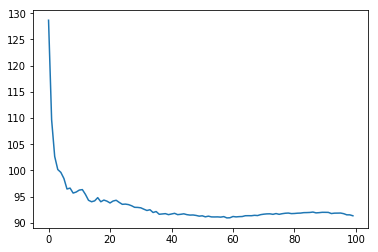

In [279]:
plt.plot(acc_knn)

In [301]:
neighopt = KNeighborsRegressor(n_neighbors=1, weights= 'distance')

In [302]:
neighopt.fit(X2train_scal, y2train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='distance')

In [303]:
ypred_opt = neighopt.predict(X2test_scal)

In [304]:
np.sqrt(mean_squared_error(y2test, ypred_opt))

128.67526083642787

(0, 500)

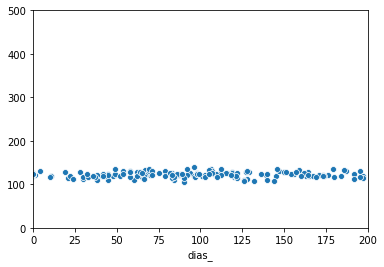

In [305]:
sns.scatterplot(y2test, y2pred2)
plt.xlim(0,200)
plt.ylim(0, 500)

In [307]:
rfr.fit(X2train_scal, y2train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [308]:
forest_fe_y = rfr.predict(X2test_scal)

In [310]:
np.sqrt(mean_squared_error(y2test, forest_fe_y))

102.76975678696974

(0, 500)

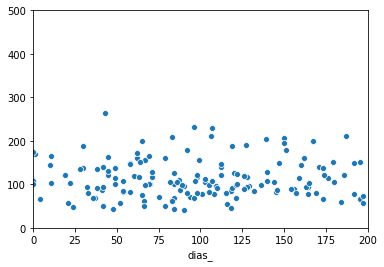

In [311]:
sns.scatterplot(y2test, forest_fe_y)
plt.xlim(0,200)
plt.ylim(0, 500)

# XGboost

In [949]:
import xgboost as xgb

In [950]:
model = xgb.XGBRegressor()

In [951]:
model.fit(Xtrain_scal,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:21:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [952]:
output = model.predict(data=Xtest_scal)

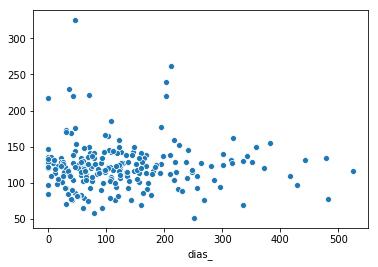

In [953]:
sns.scatterplot(ytest, output)
#plt.xlim(0,200)
#plt.ylim(0, 500)

In [200]:
model.fit(Xpcatrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:30:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [201]:
pcaoutput = model.predict(data=Xpcatest)

(0, 500)

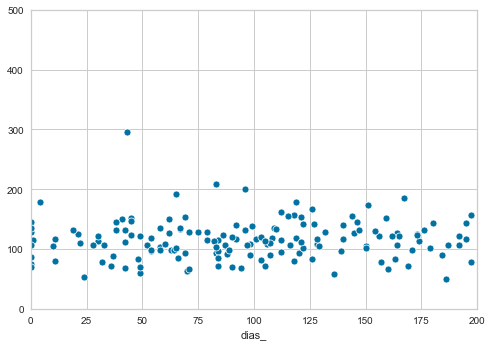

In [202]:
sns.scatterplot(ytest, pcaoutput)
plt.xlim(0,200)
plt.ylim(0, 500)